<a href="https://colab.research.google.com/github/iwakaru/Machine_Learning/blob/main/Practice_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random
N = 10000
d = 10
ads_selected = []
nRewards1 = [0] * d
nRewards0 = [0] * d
totReward = 0
for n in range(0, N):
  ad = 0
  maxRandom = 0
  for i in range(0, d):
    randomBeta = random.betavariate(nRewards1[i] + 1, nRewards0[i] + 1)
    if (randomBeta > maxRandom):
      maxRandom = randomBeta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    nRewards1[ad] = nRewards1[ad] + 1
  else:
    nRewards0[ad] =  nRewards0[ad] + 1
  totReward = totReward + reward


## Visualising the results - Histogram

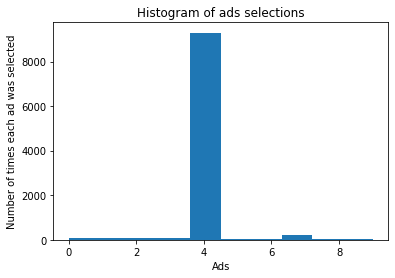

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()